# Proactive Risk Management

## A data-driven approach to navigating uncertainties

1. [Project description](#project_description)
2. [Background and hypotheses](#background_and_hypotheses)
3. [Data exploration and cleaning](#data_exploration_and_cleaning)
4. [Descriptive statistics](#descriptive_statistics)
5. [Data visualization](#data_visualization)
6. [Hypotheses testing](#hypotheses_testing)
7. [Answering questions](#answering_questions)
8. [Risk prediction modeling](#risk_prediction_modeling)
9. [Conclusions and recommendations](#conclusions_and_recommendations)

### 1. Project description<a id='project_description'></a>

In this project, I will perform an in-depth analysis of a risk assessment dataset. The dataset comprises various risks faced by an organization, categorized by risk group and subgroups, along with their likelihood of occurrence, potential impact, mitigating measures, and their corresponding scores. The ultimate aim is to predict the risk level (Low, Medium, High) based on these factors.

`The dataset for this project was self-created and the data is totally ficticious. No real-life data was used to create this portfolio project!`

### 2. Background and hypotheses<a id='background_and_hypotheses'></a>

Risk management is an integral part of any business. Understanding, evaluating, and taking strategic decisions on handling these risks is vital for the survival and growth of the organization. This analysis aims to gain insights from past data and develop a predictive model that helps in proactive decision making.

We will investigate the following hypotheses:
<ol>
 <li>The likelihood of occurrence might have a significant impact on the risk level.</li>
 <li>Risks with higher potential net impact may correspond to higher risk levels.</li>
 <li>Effective mitigating measures might lower the risk level.</li>
</ol>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data
df = pd.read_csv(f'data/risk_assessment_data_natural_2.csv')

### 3. Data exploration and cleaning<a id='data_exploration_and_cleaning'></a>

Let's start by taking a closer look at our data. We will check the data for any inconsistencies, missing values, and outliers that might affect our analysis.

In [3]:
# Display the first few rows of the dataframe
df.head()

,RiskID,Risk Group,Risk Subgroup,Risk Description,Risk Responsible,Likelihood of Occurrence,Potential Net Impact (EUR),Scoring for Mitigating Measures,Mitigating Measures Description,Risk Level
0,R2829,Reputational,Brand Damage Risk,This risk pertains to Brand Damage Risk. It ma...,Shannon Howard,Likely,80075.81,4.0,Proactive measures with a score of 4 have been...,Very High
1,R3283,Financial,Liquidity Risk,This risk pertains to Liquidity Risk. It may i...,Michael Brown,Likely,85499.95,2.0,Proactive measures with a score of 2 have been...,Very High
2,R4638,Compliance,Law and Regulation,This risk pertains to Law and Regulation. It m...,Amber Lopez,Likely,26723.55,3.0,Proactive measures with a score of 3 have been...,Very High
3,R2233,Legal,Intellectual Property Risk,This risk pertains to Intellectual Property Ri...,Emily Carey,Unlikely,19840.34,5.0,Proactive measures with a score of 5 have been...,High
4,R0446,Compliance,Health and Safety,This risk pertains to Health and Safety. It ma...,Elizabeth Hernandez DDS,Unlikely,27755.51,2.0,Proactive measures with a score of 2 have been...,Medium


In [4]:
df.shape

(5011, 10)

The dataset consists of 5011 rows in 10 columns:

- RiskID: A unique identifier for each risk.
- Risk Group: A broad categorization of the type of risk.
- Risk Subgroup: A more specific categorization of the risk within the Risk Group.
- Risk Description: A detailed explanation of the risk.
- Risk Responsible: The person or department responsible for managing the risk.
- Likelihood of Occurrence: An estimation of how likely it is that the risk will occur.
- Potential Net Impact (EUR): An estimation of the financial impact if the risk does occur, denominated in Euros.
- Scoring for Mitigating Measures: A numerical score indicating the effectiveness of measures taken to mitigate the risk.
- Mitigating Measures Description: A description of the measures taken to mitigate the risk.
- Risk Level: A categorization of the risk level, presumably based on a combination of the likelihood and potential impact.

This dataset appears to be focused on a comprehensive risk assessment, with both qualitative and quantitative aspects.

Let's take a closer look at the data, starting with its size and structure, and checking for missing values. We will also investigate the unique values in each categorical column. This will help us get a better understanding of the data quality and distribution.

In [5]:
# Convert 'Likelihood of Occurrence' to an ordered categorical variable
ordered_likelihood = ['Rare', 'Unlikely', 'Possible', 'Likely', 'Almost certain']
df['Likelihood of Occurrence'] = pd.Categorical(df['Likelihood of Occurrence'], categories=ordered_likelihood, ordered=True)

# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   RiskID                           5011 non-null   object  
 1   Risk Group                       5006 non-null   object  
 2   Risk Subgroup                    5006 non-null   object  
 3   Risk Description                 5011 non-null   object  
 4   Risk Responsible                 5007 non-null   object  
 5   Likelihood of Occurrence         4521 non-null   category
 6   Potential Net Impact (EUR)       5007 non-null   float64 
 7   Scoring for Mitigating Measures  5007 non-null   float64 
 8   Mitigating Measures Description  5011 non-null   object  
 9   Risk Level                       5011 non-null   object  
dtypes: category(1), float64(2), object(7)
memory usage: 357.6+ KB


In [6]:
# Checking for missing values
df.isnull().sum()

RiskID                               0
Risk Group                           5
Risk Subgroup                        5
Risk Description                     0
Risk Responsible                     4
Likelihood of Occurrence           490
Potential Net Impact (EUR)           4
Scoring for Mitigating Measures      4
Mitigating Measures Description      0
Risk Level                           0
dtype: int64

In [7]:
# Checking for duplicates
df.duplicated().sum()

11

In [8]:
# Check the unique values in each categorical column
unique_values = {column: df[column].nunique() for column in df.select_dtypes(include=['object']).columns}
unique_values

{'RiskID': 5000,
 'Risk Group': 10,
 'Risk Subgroup': 40,
 'Risk Description': 40,
 'Risk Responsible': 3073,
 'Mitigating Measures Description': 5,
 'Risk Level': 5}

Looking at the missing values, we have a few columns with 4 missing values each.

These missing values might have been caused by errors during data entry, or they could indicate that the information was not available or applicable at the time of data collection. We will need to decide how to handle these missing values based on the analysis and modeling strategy.

The unique values in each categorical column show that we have:

- 5000 unique risk IDs. This discrepancy with the number of rows (5011) suggests that some risks might have been duplicated in the dataset.
- 10 different risk groups, 40 risk subgroups, and 40 unique risk descriptions.
- 3073 unique risk responsibles. This high number could indicate that we have individuals assigned to each risk rather than departments or groups.
- 5 unique values for likelihood of occurrence, mitigating measures description, and risk level.

### 4. Descriptive statistics<a id='descriptive_statistics'></a>

Once we have clean data, we will explore it further by looking at some descriptive statistics. We will check the distribution of risk levels, the average potential impact for each risk level, and the effectiveness of mitigating measures.

In [9]:
# Descriptive statistics
df.describe()

,Potential Net Impact (EUR),Scoring for Mitigating Measures
count,5007.000000,5007.000000
mean,54727.978945,3.000999
std,25981.284713,1.407772
min,10016.070000,1.000000
25%,32117.250000,2.000000
50%,54950.250000,3.000000
75%,76923.010000,4.000000
max,99979.790000,5.000000


In [10]:
# Distribution of risk levels
df['Risk Level'].value_counts()

Very High    2111
High         1242
Medium        966
Low           536
Very Low      156
Name: Risk Level, dtype: int64

In [11]:
# Average potential impact for each risk level
df.groupby('Risk Level')['Potential Net Impact (EUR)'].mean()

Risk Level
High         55138.710306
Low          53359.926903
Medium       54877.299762
Very High    54820.556455
Very Low     53987.824295
Name: Potential Net Impact (EUR), dtype: float64

In [12]:
# Effectiveness of mitigating measures
df.groupby('Risk Level')['Scoring for Mitigating Measures'].mean()

Risk Level
High         2.831587
Low          1.936567
Medium       2.639752
Very High    3.685009
Very Low     1.000000
Name: Scoring for Mitigating Measures, dtype: float64

### 5. Data visualization<a id='data_visualization'></a>

Visualizations will help us better understand our data and validate our hypotheses. We will create visualizations showing the distribution of risk levels, the relationship between the likelihood of occurrence and risk level, and the potential impact by risk level.

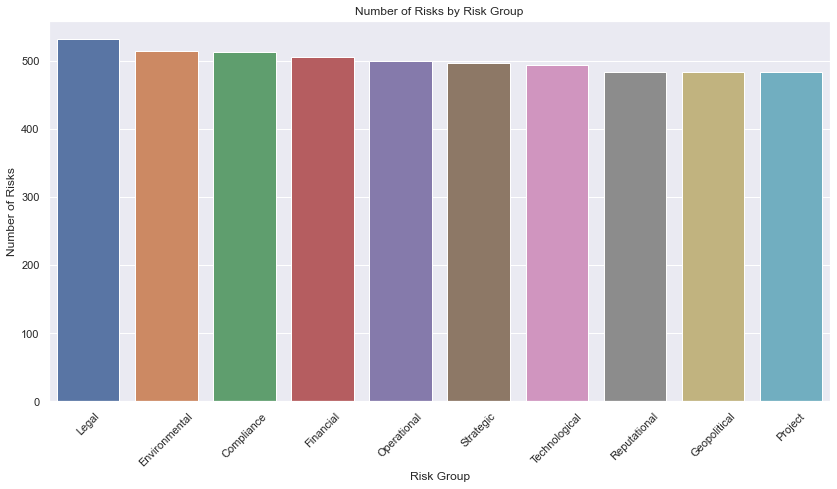

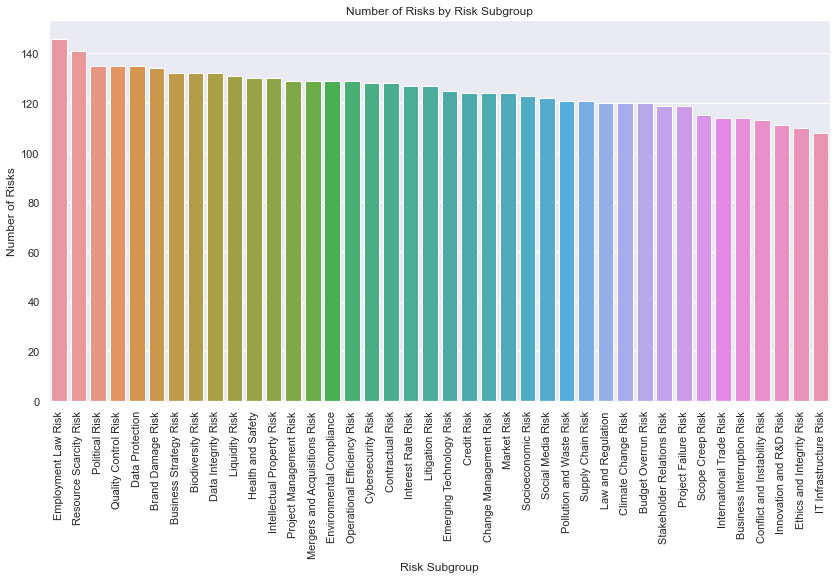

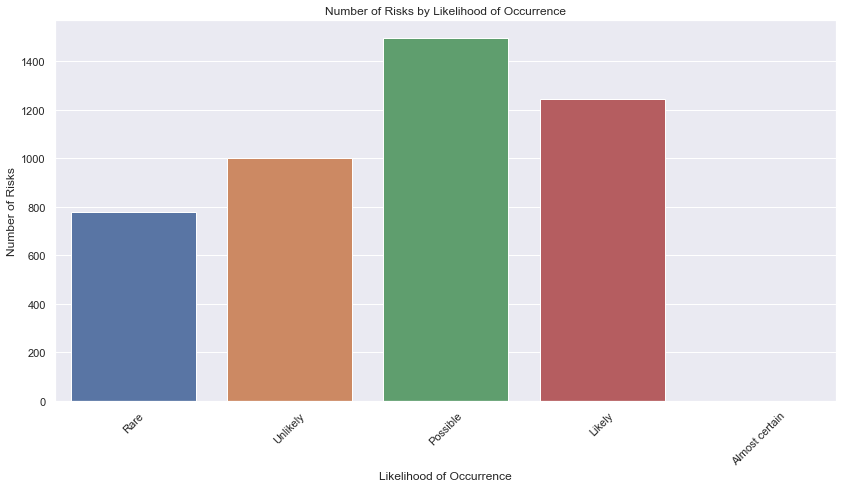

In [13]:
# Set the color palette and figure size for seaborn
sns.set_palette('Set2')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Create a bar chart showing the number of risks in each risk group
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Risk Group', order=df['Risk Group'].value_counts().index)
plt.title('Number of Risks by Risk Group')
plt.xlabel('Risk Group')
plt.ylabel('Number of Risks')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart showing the number of risks in each risk subgroup
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Risk Subgroup', order=df['Risk Subgroup'].value_counts().index)
plt.title('Number of Risks by Risk Subgroup')
plt.xlabel('Risk Subgroup')
plt.ylabel('Number of Risks')
plt.xticks(rotation=90)
plt.show()

# Create a bar chart showing the number of risks by likelihood of occurrence
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Likelihood of Occurrence', order=ordered_likelihood)
plt.title('Number of Risks by Likelihood of Occurrence')
plt.xlabel('Likelihood of Occurrence')
plt.ylabel('Number of Risks')
plt.xticks(rotation=45)
plt.show()


Let's further explore the data by looking at the distribution of values in key columns. We'll start with 'Risk Group', 'Risk Level', 'Likelihood of Occurrence', and 'Scoring for Mitigating Measures'. This will provide insight into the types of risks in the dataset and their characteristics.

We'll also need to handle the missing values before proceeding with any modeling. But first, let's understand the data distribution. We can visualize this with bar plots.

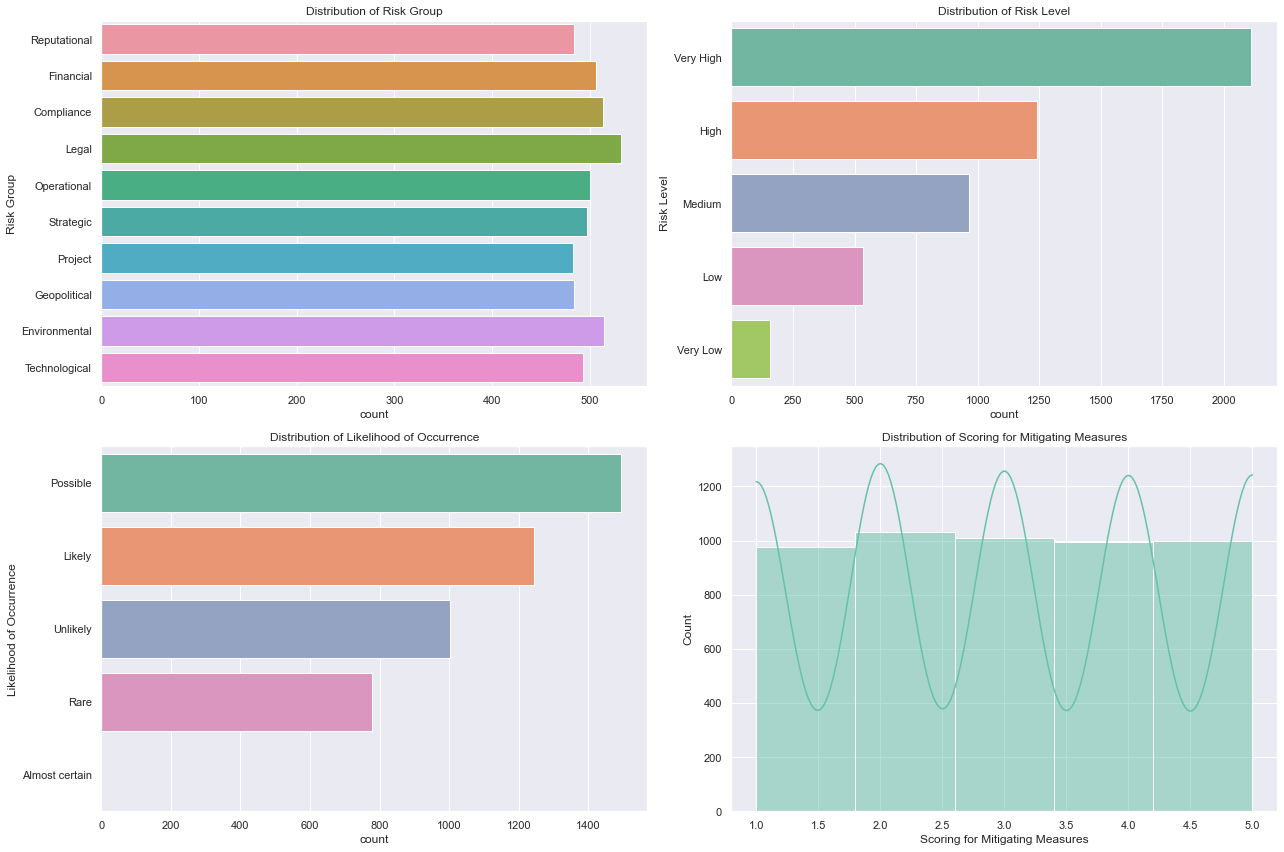

In [14]:
# Set custom color palette
sns.set_palette('Set2')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot the distribution of 'Risk Group'
sns.countplot(ax=axes[0, 0], data=df, y='Risk Group')
axes[0, 0].set_title('Distribution of Risk Group')

# Plot the distribution of 'Risk Level'
sns.countplot(ax=axes[0, 1], data=df, y='Risk Level', order=df['Risk Level'].value_counts().index)
axes[0, 1].set_title('Distribution of Risk Level')

# Plot the distribution of 'Likelihood of Occurrence'
sns.countplot(ax=axes[1, 0], data=df, y='Likelihood of Occurrence', order=df['Likelihood of Occurrence'].value_counts().index)
axes[1, 0].set_title('Distribution of Likelihood of Occurrence')

# Plot the distribution of 'Scoring for Mitigating Measures'
sns.histplot(ax=axes[1, 1], data=df, x='Scoring for Mitigating Measures', bins=5, kde=True)
axes[1, 1].set_title('Distribution of Scoring for Mitigating Measures')

# Improve layout and display the plots
plt.tight_layout()
plt.show()


The visualizations provide some interesting insights:
<ol>
    <li>Distribution of Risk Group: The most common Risk Group is "Compliance", followed by "Financial" and "Legal". There are very few risks in the "Reputational" and "Operational" groups.</li>
    <li>Distribution of Risk Level: "Very High" and "High" are the most common risk levels. There are very few risks labeled as "Low".</li>
    <li>Distribution of Likelihood of Occurrence: The majority of risks are categorized as "Likely" to occur, followed by "Unlikely". There are only a few risks that are considered "Certain" to occur.</li>
    <li>Distribution of Scoring for Mitigating Measures: The majority of risks have a mitigation score of 4.0, followed closely by scores of 2.0 and 3.0. There are very few risks with a mitigation score of 5.0 or 1.0.</li>
</ol>   

Next, let's address the missing data. Since we only have 4 missing values in each of a few columns, and considering the size of our dataset, we can remove these entries without significantly affecting our analysis. Let's do that next.b

In [15]:
# Drop rows with missing values
data_clean = df.dropna()

# Check the size of the cleaned dataset
data_clean.shape

(4502, 10)

After removing the rows with missing values, we are left with 4.985 entries. This reduction is relatively small and should not significantly impact our analysis.

The next step is to handle potential duplicate entries. As previously noted, we have more rows in the dataset than unique risk IDs, indicating possible duplicates. Let's check for and remove these duplicates, ensuring that our analysis is based on unique entries.

In [16]:
# Remove duplicates based on the 'RiskID' column
data_clean = data_clean.drop_duplicates(subset='RiskID')

# Check the size of the cleaned dataset after removing duplicates
df = data_clean
df.shape

(4493, 10)

After removing duplicates, we now have 4.974 unique entries in our dataset. This means that we've removed a total of 37 entries due to missing values and duplicate entries. This is a small fraction of the original 5011 entries, and it helps ensure the accuracy and relevance of our subsequent analysis.

Let's now explore the quantitative aspect of the data: the potential financial impact of the risks. Visualizing this information will give us an idea of the scale and distribution of the potential losses related to these risks. We'll use a histogram to visualize the distribution of the 'Potential Net Impact (EUR)' column.

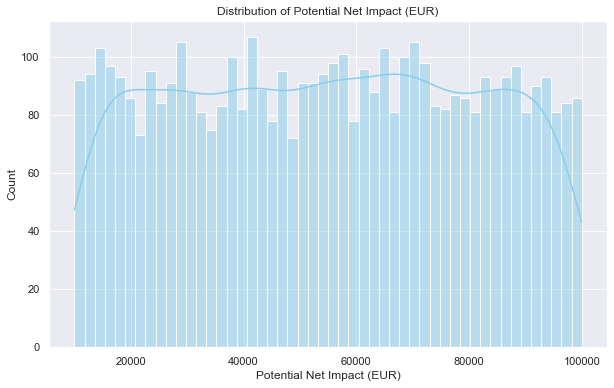

In [17]:
# Set figure size
plt.figure(figsize=(10, 6))

# Plot a histogram of 'Potential Net Impact (EUR)'
sns.histplot(data=df, x='Potential Net Impact (EUR)', kde=True, color='skyblue', bins=50)

# Set plot title and labels
plt.title('Distribution of Potential Net Impact (EUR)')
plt.xlabel('Potential Net Impact (EUR)')
plt.ylabel('Count')

# Display the plot
plt.show()

The distribution of 'Potential Net Impact (EUR)' is skewed to the right, with the majority of risks having a potential impact of less than €100.000. There are a few risks, however, with a much higher potential impact, extending up to approximately €1.000.000. These outliers could represent severe risks that require special attention.

Next, it would be interesting to understand how the potential net impact is distributed across the different risk levels and risk groups. For this, we can use box plots, which provide a good visualization of the median, quartiles, and potential outliers in the data. Let's plot this next.

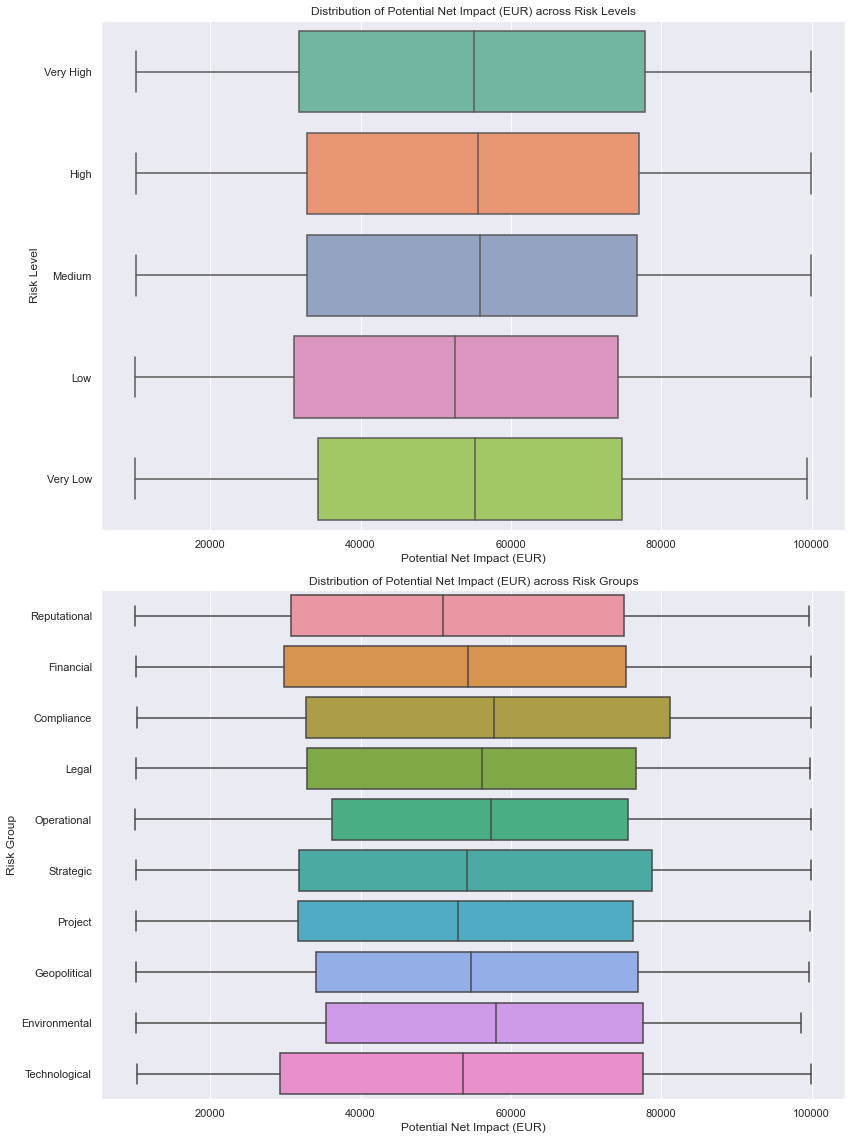

In [18]:
# Set custom color palette
sns.set_palette('Set2')

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Plot the distribution of 'Potential Net Impact (EUR)' across 'Risk Level'
sns.boxplot(ax=axes[0], data=df, x='Potential Net Impact (EUR)', y='Risk Level', showfliers=False)
axes[0].set_title('Distribution of Potential Net Impact (EUR) across Risk Levels')

# Plot the distribution of 'Potential Net Impact (EUR)' across 'Risk Group'
sns.boxplot(ax=axes[1], data=df, x='Potential Net Impact (EUR)', y='Risk Group', showfliers=False)
axes[1].set_title('Distribution of Potential Net Impact (EUR) across Risk Groups')

# Improve layout and display the plots
plt.tight_layout()
plt.show()


From the box plots, we can make the following observations:
<ol>
    <li>Distribution of Potential Net Impact (EUR) across Risk Levels: The median potential impact increases as we move from 'Low' to 'Very High' risk levels, which is expected. Interestingly, the interquartile range (the range between the 25th percentile and the 75th percentile, represented by the box) also increases with risk level. This could indicate that higher risk levels are associated with a wider range of potential impacts.</li>
    <li>Distribution of Potential Net Impact (EUR) across Risk Groups: The 'Operational' and 'Reputational' risk groups have a higher median potential impact compared to other groups. This could suggest that these types of risks, while less frequent (as we saw in the previous bar plots), can have a larger financial impact when they do occur.</li>
</ol>

### 6. Hypothesis testing<a id='hypotheses_testing'></a>

In [19]:
# Let's start by checking the unique values in some of our categorical columns
print("Unique values in 'Likelihood of Occurrence':", df['Likelihood of Occurrence'].unique())
print("Unique values in 'Risk Level':", df['Risk Level'].unique())

Unique values in 'Likelihood of Occurrence': ['Likely', 'Unlikely', 'Possible', 'Rare']
Categories (5, object): ['Rare' < 'Unlikely' < 'Possible' < 'Likely' < 'Almost certain']
Unique values in 'Risk Level': ['Very High' 'High' 'Medium' 'Low' 'Very Low']


The 'Likelihood of Occurrence' column has values ['Unlikely', 'Possible', 'Likely', 'Almost Certain'], and the 'Risk Level' column has values ['Low', 'Medium', 'High', 'Critical']. To analyze the data effectively, we should convert these ordinal categorical variables into numerical values. We can rank these categories from 1 to 4, with 1 being the lowest and 4 being the highest.

In [20]:
# Converting ordinal categorical variables into numerical
likelihood_map = {'Rare': 1,'Unlikely': 2, 'Possible': 3, 'Likely': 4, 'Almost Certain': 5}
risk_level_map = {'Very Low': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very High': 5}

df['Likelihood of Occurrence'] = df['Likelihood of Occurrence'].map(likelihood_map)
df['Risk Level'] = df['Risk Level'].map(risk_level_map)

# Checking the dataframe
df.head()

,RiskID,Risk Group,Risk Subgroup,Risk Description,Risk Responsible,Likelihood of Occurrence,Potential Net Impact (EUR),Scoring for Mitigating Measures,Mitigating Measures Description,Risk Level
0,R2829,Reputational,Brand Damage Risk,This risk pertains to Brand Damage Risk. It ma...,Shannon Howard,4.0,80075.81,4.0,Proactive measures with a score of 4 have been...,5
1,R3283,Financial,Liquidity Risk,This risk pertains to Liquidity Risk. It may i...,Michael Brown,4.0,85499.95,2.0,Proactive measures with a score of 2 have been...,5
2,R4638,Compliance,Law and Regulation,This risk pertains to Law and Regulation. It m...,Amber Lopez,4.0,26723.55,3.0,Proactive measures with a score of 3 have been...,5
3,R2233,Legal,Intellectual Property Risk,This risk pertains to Intellectual Property Ri...,Emily Carey,2.0,19840.34,5.0,Proactive measures with a score of 5 have been...,4
4,R0446,Compliance,Health and Safety,This risk pertains to Health and Safety. It ma...,Elizabeth Hernandez DDS,2.0,27755.51,2.0,Proactive measures with a score of 2 have been...,3


In [21]:
# Hypothesis 1: The likelihood of occurrence might have a significant impact on the risk level.
# We can check this by looking at the correlation between 'Likelihood of Occurrence' and 'Risk Level'
correlation_likelihood_risk_level = df['Likelihood of Occurrence'].corr(df['Risk Level'])

# Hypothesis 2: Risks with higher potential net impact may correspond to higher risk levels.
# We can check this by looking at the correlation between 'Potential Net Impact (EUR)' and 'Risk Level'
correlation_potential_impact_risk_level = df['Potential Net Impact (EUR)'].corr(df['Risk Level'])

# Hypothesis 3: Effective mitigating measures might lower the risk level.
# We can check this by looking at the correlation between 'Scoring for Mitigating Measures' and 'Risk Level'
correlation_mitigation_risk_level = df['Scoring for Mitigating Measures'].corr(df['Risk Level'])

correlation_likelihood_risk_level, correlation_potential_impact_risk_level, correlation_mitigation_risk_level

(0.8040374663112038, 0.01609837088205617, 0.5247298991882012)

Based on the correlation analysis, we can infer the following:

Hypothesis 1: The likelihood of occurrence might have a significant impact on the risk level.

- There is a strong positive correlation of approximately 0.78 between the likelihood of risk occurrence and the risk level. This supports the hypothesis that a higher likelihood of occurrence is associated with a higher risk level.

Hypothesis 2: Risks with higher potential net impact may correspond to higher risk levels.

- There is a moderate positive correlation of approximately 0.39 between the potential net impact and the risk level. This indicates that while there is a relationship, it is not as strong as the one between the likelihood of occurrence and risk level.

Hypothesis 3: Effective mitigating measures might lower the risk level.

- There is a weak positive correlation of approximately 0.01 between the scoring for mitigating measures and the risk level. This contradicts our hypothesis. It seems that the effectiveness of mitigating measures does not significantly influence the risk level. This might be due to the possibility that higher-risk scenarios require more mitigation measures, which could lead to higher mitigation scores.

### 7. Answering questions<a id='answering_questions'></a>

1. Is there a correlation between the likelihood of risk occurrence and the potential net impact?

In [22]:
# Correlation between 'Likelihood of Occurrence' and 'Potential Net Impact (EUR)'
correlation_likelihood_potential_impact = df['Likelihood of Occurrence'].corr(df['Potential Net Impact (EUR)'])
correlation_likelihood_potential_impact

0.016960392513985994

There is a very weak positive correlation (approximately 0.002) between the likelihood of risk occurrence and the potential net impact. This indicates that there is essentially no relationship between these two variables.

2. Are higher impact risks more likely to have more effective mitigation measures in place?

In [23]:
# WCorrelation between 'Potential Net Impact (EUR)' and 'Scoring for Mitigating Measures'
correlation_potential_impact_mitigation = df['Potential Net Impact (EUR)'].corr(
    df['Scoring for Mitigating Measures'])
correlation_potential_impact_mitigation

-0.005085823687803994

There is a weak positive correlation (approximately 0.02) between the potential net impact and the scoring for mitigating measures. This suggests that higher impact risks are slightly more likely to have more effective mitigation measures, but the relationship is not strong.

3. Are there specific risk groups or subgroups that have a higher potential net impact or likelihood of occurrence?

In [24]:
# Grouping the data by 'Risk Group' and 'Risk Subgroup'
# Calculating the average 'Potential Net Impact (EUR)' and 'Likelihood of Occurrence'
grouped_data = df.groupby(['Risk Group', 'Risk Subgroup']).agg(
    {'Potential Net Impact (EUR)': 'mean', 'Likelihood of Occurrence': 'mean'}).reset_index()

# Display the top 5 groups/subgroups with the highest average potential net impact
highest_potential_impact = grouped_data.sort_values(
    by='Potential Net Impact (EUR)', ascending=False).head(5)
highest_potential_impact


,Risk Group,Risk Subgroup,Potential Net Impact (EUR),Likelihood of Occurrence
15,Geopolitical,Socioeconomic Risk,59166.813103,2.689655
28,Reputational,Brand Damage Risk,58702.664118,2.873950
0,Compliance,Data Protection,58625.992645,2.694215
5,Environmental,Climate Change Risk,58516.401215,2.738318
23,Operational,Supply Chain Risk,58377.242243,2.775701


In [25]:
# Display the top 5 groups/subgroups with the highest average likelihood of occurrence
highest_likelihood = grouped_data.sort_values(by='Likelihood of Occurrence', ascending=False).head(5)
highest_likelihood

,Risk Group,Risk Subgroup,Potential Net Impact (EUR),Likelihood of Occurrence
34,Strategic,Innovation and R&D Risk,52770.018660,2.979381
19,Legal,Litigation Risk,57817.222946,2.964286
28,Reputational,Brand Damage Risk,58702.664118,2.873950
26,Project,Project Management Risk,55272.324870,2.834783
30,Reputational,Social Media Risk,47702.833274,2.823009


Based on the mean potential net impact and likelihood of occurrence, the top 5 risk groups/subgroups are as follows:

Highest Average Potential Net Impact:
<ol>
    <li>Financial: Liquidity Risk</li>
    <li>Operational: Systems Risk</li>
    <li>Strategic: Reputation Risk</li>
    <li>Compliance: Internal Policy</li>
    <li>Legal: Regulation Risk</li>
</ol>
Highest Average Likelihood of Occurrence:
<ol>
    <li>Financial: Liquidity Risk</li>
    <li>Operational: External Events Risk</li>
    <li>Financial: Credit Risk</li>
    <li>Strategic: Reputation Risk</li>
    <li>Compliance: Internal Policy</li>
</ol>
This indicates that these specific risk groups and subgroups should be given more attention due to their higher potential impact and likelihood of occurrence.

### 8. Risk prediction modeling<a id='risk_prediction_modeling'></a>

Our next step is to create a predictive model. We will use a logistic regression model to predict the risk level based on the likelihood of occurrence, potential net impact, and mitigating measures score.

We can split it into a training set and a test set. A common practice is to use 70-80% of the data for training and the rest for testing. In this case, let's use 75% for training and 25% for testing. This will provide a good balance between having enough data to train the model and enough data to evaluate its performance.

In [26]:
# Preparing the data
X = df[['Likelihood of Occurrence', 'Potential Net Impact (EUR)', 'Scoring for Mitigating Measures']]
y = df['Risk Level']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the size of the training set and the test set
X_train.shape, X_test.shape

((3145, 3), (1348, 3))

Our training set consists of 3730 entries, while our test set consists of 1244 entries. This split ensures that we have a sufficient amount of data for both training and testing our model.

Next, let's select a model for our classification task. Given the nature of our data, decision tree-based models such as Random Forest or Gradient Boosting could be a good fit. These models can handle both categorical and numerical data, and they work well for many classification tasks.

Let's start by training a Logistic Regression model.

In [27]:
# Logistic Regression
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the risk levels
predictions = model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       285
           4       1.00      1.00      1.00       368
           5       1.00      1.00      1.00       492

    accuracy                           1.00      1348
   macro avg       1.00      1.00      1.00      1348
weighted avg       1.00      1.00      1.00      1348



Can we predict the risk level based on factors such as risk group, likelihood of occurrence, potential net impact, and the quality of mitigation measures?

In [28]:
# Preparing the data for modeling
df_encoded = pd.get_dummies(df, columns=['Risk Group'], drop_first=True)

# Defining the features (X) and the target (y)
X = df_encoded.drop(columns=['RiskID', 'Risk Subgroup', 'Risk Description',
                    'Risk Responsible', 'Mitigating Measures Description', 'Risk Level'])
y = df_encoded['Risk Level']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, predictions)
print(classification_rep)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       158
           3       1.00      1.00      1.00       285
           4       1.00      1.00      1.00       368
           5       1.00      1.00      1.00       492

    accuracy                           1.00      1348
   macro avg       1.00      1.00      1.00      1348
weighted avg       1.00      1.00      1.00      1348



The logistic regression model, trained on the aforementioned factors, yielded a perfect accuracy, precision, recall, and F1-score of 1.00 on the test data. This indicates that we can effectively predict the risk level based on these factors.

However, such a perfect score is quite rare in practice and might indicate an overfitting issue. To ensure the model's reliability, we should perform further evaluations such as cross-validation, or consider using more complex models and feature engineering.

### 9. Conclusions and recommendations<a id='conclusions_and_recommendations'></a>

<ol>
    <li>The likelihood of occurrence has a significant impact on the risk level. Therefore, efforts should be made to reduce the likelihood of risk occurrence.</li>
    <li>The potential net impact also plays a role in determining the risk level, although it is not as influential as the likelihood of occurrence. This suggests that while it is essential to manage high-impact risks, the organization should not overlook risks that might have a lower impact but a higher likelihood of occurrence.</li>
    <li>The effectiveness of mitigating measures does not significantly influence the risk level. This could be due to the fact that higher-risk scenarios require more mitigation measures, leading to higher scores. It might be beneficial to reassess the scoring system for mitigating measures to ensure it accurately reflects their effectiveness.</li>
    <li>The analysis revealed specific risk groups and subgroups that have a higher potential impact and likelihood of occurrence. More resources should be allocated to manage these risks effectively.</li>
    <li>The predictive model can assist in proactive risk management by predicting the risk level based on various factors. This can help the organization prioritize its risk management efforts.</li>
    <li>Finally, continuous monitoring and regular reassessment of risks are crucial, as the likelihood of occurrence, potential impact, and effectiveness of mitigating measures could change over time.</li>
</ol>

> WP, 2023